In [1]:
%pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [2]:
books_df = pd.read_csv('Dataset\Books.csv')
users_df = pd.read_csv('Dataset\Ratings.csv')
ratings_df = pd.read_csv('Dataset\Ratings.csv')

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
C:\Users\benem\AppData\Local\Temp\ipykernel_39880\709790853.py:1: SyntaxWarning: invalid escape sequence '\B'
  books_df = pd.read_csv('Dataset\Books.csv')
C:\Users\benem\AppData\Local\Temp\ipykernel_39880\709790853.py:2: SyntaxWarning: invalid escape sequence '\R'
  users_df = pd.read_csv('Dataset\Ratings.csv')
C:\Users\benem\AppData\Local\Temp\ipykernel_39880\709790853.py:3: SyntaxWarning: invalid escape sequence '\R'
  ratings_df = pd.read_csv('Dataset\Ratings.csv')
C:\Users\benem\AppData\Local\Temp\ipykernel_39880\709790853.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv('Dataset\Books.csv')


## Exploratory Data Analysis 

In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


ISBN is the unique ID of a book and image URL is the URL of the cover image of the book and has three sizes : S,M,L

In [4]:
users_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Age columnn has a lot of missing values that will need to be taken care of

In [5]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


The User ID can be mapped against the User ID in the ratings dataset to get the user's ratings for all books. 

In [6]:
print(books_df.shape)
print(ratings_df.shape)
print(users_df.shape)

(271360, 8)
(1149780, 3)
(1149780, 3)


There are 278,858 user that have given 1,149,780 ratings for 271,360 books. Some users may have rates 1 or more books.

In [7]:
print('Books Dataset info\n')
books_df.info()
print('\nMissing values in Books Dataset')
books_df.isnull().sum()

Books Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB

Missing values in Books Dataset


ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

The book author names and publisher names are missing for 2 books. The Large image url is also missing for 3 books. The missing values are not a lot and can be taken care of.
also we observe that all the colunms are of object type.


In [8]:
print('User Datset Info\n')
users_df.info()
print('\nMissing values in user dataset')
users_df.isnull().sum()

User Datset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB

Missing values in user dataset


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

The age for 110,762 users is missing. However this column is not imporant for our Collaorative recommender system.

Here we observe that the User ID and age are int and float type where as location is of object type.

In [9]:
print('rating Dataset Info\n')
ratings_df.info()
print('\nMissing values in rating dataset')
ratings_df.isnull().sum()

rating Dataset Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB

Missing values in rating dataset


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [10]:
print('Dupicate values in books Dataset')
print(books_df.duplicated().sum())
print('Duplcaite values in rating dataset')
print(ratings_df.duplicated().sum())
print('Duplicate values in users dataset')
print(users_df.duplicated().sum())

Dupicate values in books Dataset
0
Duplcaite values in rating dataset
0
Duplicate values in users dataset
0


In [11]:
print('Books Dataset Summary\n')
print(books_df.describe(include='all'))
print('Ratings Datset Summary\n')
print(ratings_df.describe())
print('Users Dataset Summary\n')
print(users_df.describe())

Books Dataset Summary

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271358               271360   
unique      271360          242135           102022                  202   
top     020130998X  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/155936078X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/155936078X

Even though the missing values are very less and can dropped, but here we will fill them with a string

In [12]:
books_df['Book-Author'].fillna('Unkown', inplace = True)
books_df['Publisher'].fillna('Unkown', inplace = True)
books_df['Image-URL-L'].fillna('No Image', inplace = True)
print(books_df.isnull().sum())


ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


C:\Users\benem\AppData\Local\Temp\ipykernel_39880\1353924811.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_df['Book-Author'].fillna('Unkown', inplace = True)
C:\Users\benem\AppData\Local\Temp\ipykernel_39880\1353924811.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In the ratings dataset, the rating value 0 would would mean an implicit rating, that is no rating given

In [13]:
zero_ratings_count = (ratings_df['Book-Rating']==0).sum()
print(f'Total zero ratings: {zero_ratings_count}')

Total zero ratings: 716109


Since the zero ratings are not useful for our recommendation we will remove them

In [14]:
ratings_df = ratings_df[ratings_df['Book-Rating']!=0]
print(f'Rating dataset count after removing zero ratings: {ratings_df.shape}')

Rating dataset count after removing zero ratings: (433671, 3)


## Univariate Plots

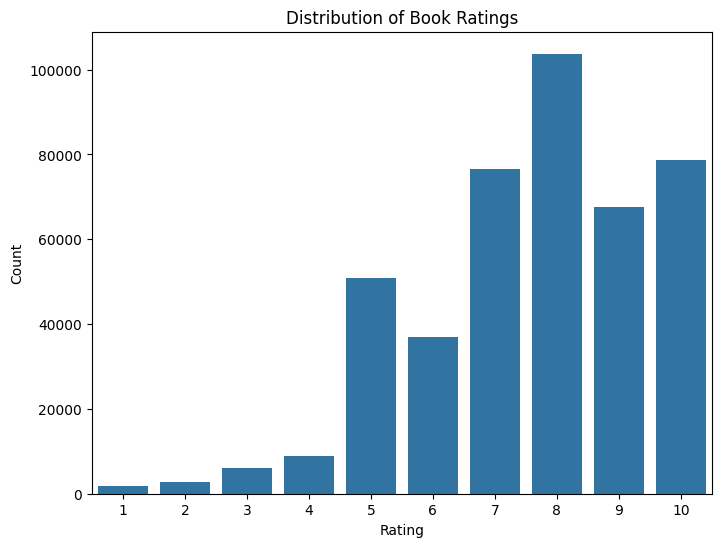

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='Book-Rating', data = ratings_df)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The distribution reveals that most users rate books positively, which is a common scenario in real-world recommendation systems.

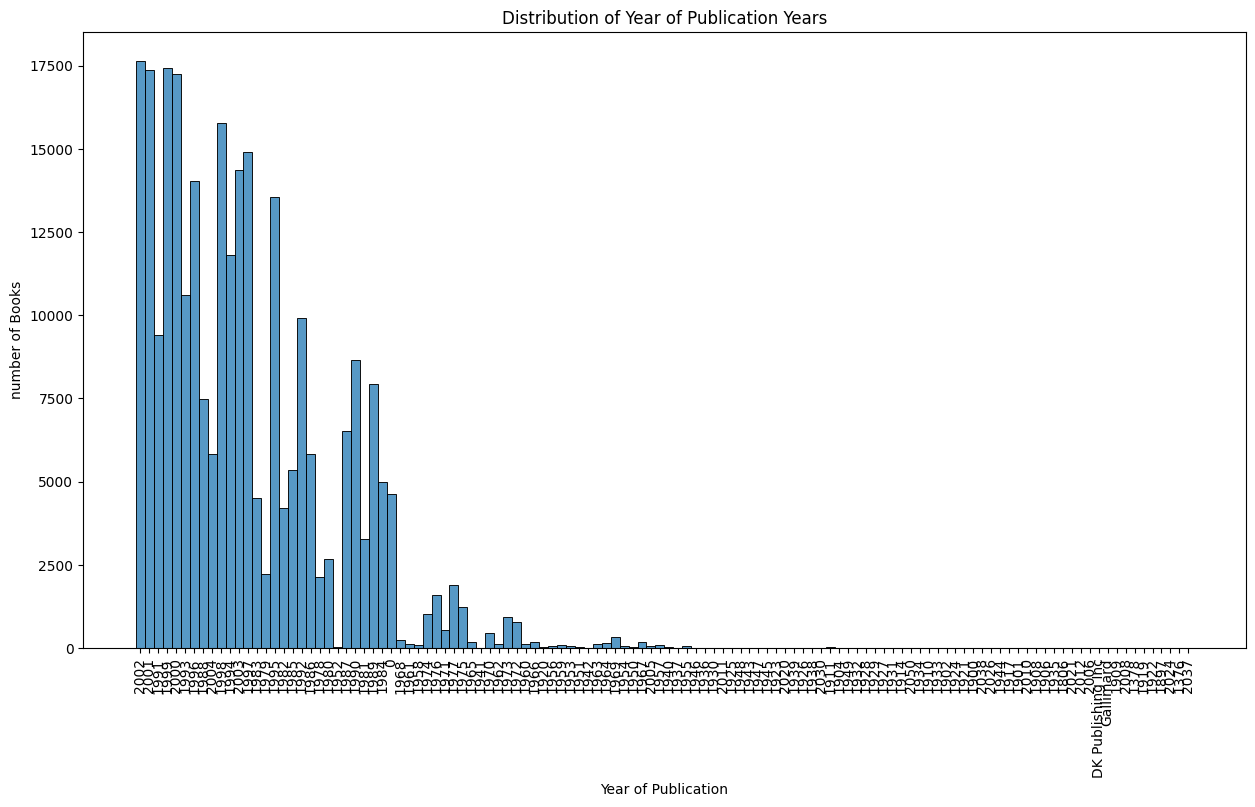

In [16]:
# Convert 'Year-Of-Publication' to string type
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(str)

plt.figure(figsize=(15,8))
sns.histplot(books_df['Year-Of-Publication'], bins = 30, kde =False)
plt.title('Distribution of Year of Publication Years')
plt.xlabel('Year of Publication')
plt.xticks(rotation = 90)
plt.ylabel('number of Books')
plt.show()

### Now let us Merge rating with books Datasets on ISBN

In [17]:
ratings_and_books = ratings_df.merge(books_df, on = 'ISBN')
print(ratings_and_books.head())

   User-ID        ISBN  Book-Rating  \
0   276726  0155061224            5   
1   276729  052165615X            3   
2   276729  0521795028            6   
3   276744  038550120X            7   
4   276747  0060517794            9   

                                          Book-Title    Book-Author  \
0                                   Rites of Passage     Judith Rae   
1                                     Help!: Level 1  Philip Prowse   
2  The Amsterdam Connection : Level 4 (Cambridge ...    Sue Leather   
3                                    A Painted House   JOHN GRISHAM   
4                           Little Altars Everywhere  Rebecca Wells   

  Year-Of-Publication                   Publisher  \
0                2001                      Heinle   
1                1999  Cambridge University Press   
2                2001  Cambridge University Press   
3                2001                   Doubleday   
4                2003                 HarperTorch   

                   

### Bivariate plot for ratings for top 10 publishers

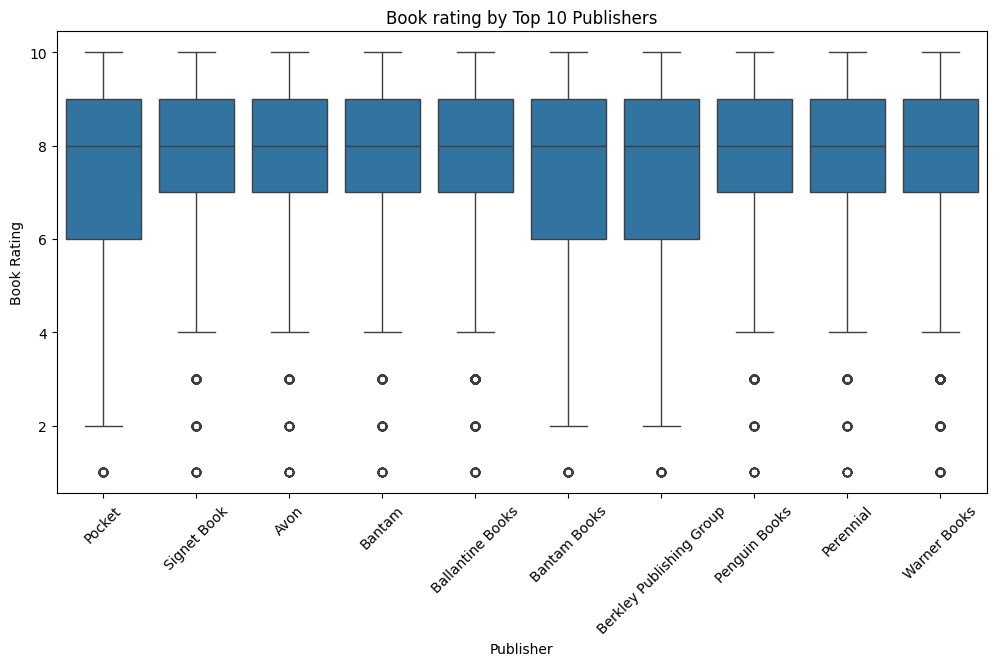

In [18]:
top_publishers = ratings_and_books['Publisher'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Publisher', y= 'Book-Rating', data = ratings_and_books[ratings_and_books['Publisher'].isin(top_publishers)])
plt.title('Book rating by Top 10 Publishers')
plt.xlabel('Publisher')
plt.xticks(rotation = 45)
plt.ylabel('Book Rating')
plt.show()

Exceptionally low ratings can be found for most of the writers. All publishers have a have media ratings around 7-8 reflectig an overall positivity bias in their opinions. 

### Finding out the number of ratings per book

In [19]:
num_rating_df = ratings_and_books.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'Number of Ratings'}, inplace = True)
num_rating_df

,Book-Title,Number of Ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135563,Ã?Â?rger mit Produkt X. Roman.,3
135564,Ã?Â?sterlich leben.,1
135565,Ã?Â?stlich der Berge.,1


### Finding the average number of ratings for each book

In [ ]:
# Calculate the average rating for each book
avg_rating_df = ratings_and_books.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'Average of Ratings'}, inplace=True)

# Round the 'Average of Ratings' to 2 decimal places
avg_rating_df['Average of Ratings'] = avg_rating_df['Average of Ratings'].round(2)

avg_rating_df

,Book-Title,Average of Ratings
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,7.000000
135564,Ã?Â?sterlich leben.,7.000000
135565,Ã?Â?stlich der Berge.,8.000000


### Merging the number of rating for each book and the average of ratings for that book

In [21]:
popularity_df = num_rating_df.merge(avg_rating_df, on = 'Book-Title')
popularity_df

,Book-Title,Number of Ratings,Average of Ratings
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


We wil only consider books where the number of ratings is greater than 100 in order to have a realistic recommendation system. We will sort the average rating in desceding order and use only the 50 higly rated books

In [22]:
popular_books_df = popularity_df[popularity_df['Number of Ratings'] >= 50]
# Sorting the data by Average of ratings in descending order
popular_books_df = popular_books_df.sort_values('Average of Ratings', ascending = False).head(50)

popular_books_df

,Book-Title,Number of Ratings,Average of Ratings
119061,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882
115128,"The Return of the King (The Lord of the Rings,...",103,9.213592
45381,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
107392,The Hobbit,50,9.120000
109837,The Little Prince,90,9.111111
18993,Charlotte's Web (Trophy Newbery),68,9.073529
45400,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
925,84 Charing Cross Road,61,9.049180
45385,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
45393,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321


For our book popularity recommender system we would need the above dataframe along with the name of the author, image of the book and the publishers name. There we will merge the above dataframe with the Books_df and then drop the columns that are not required.

In [23]:
popular_books = popular_books_df.merge(books_df, on = 'Book-Title')
popular_books


,Book-Title,Number of Ratings,Average of Ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
1,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0618002235,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...
2,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0618260595,J.R.R. Tolkien,2002,Houghton Mifflin,http://images.amazon.com/images/P/0618260595.0...,http://images.amazon.com/images/P/0618260595.0...,http://images.amazon.com/images/P/0618260595.0...
3,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0395489334,J. R. R. Tolkien,1988,Houghton Mifflin Company,http://images.amazon.com/images/P/0395489334.0...,http://images.amazon.com/images/P/0395489334.0...,http://images.amazon.com/images/P/0395489334.0...
4,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0618129081,J. R. R. Tolkien,2001,Houghton Mifflin Company,http://images.amazon.com/images/P/0618129081.0...,http://images.amazon.com/images/P/0618129081.0...,http://images.amazon.com/images/P/0618129081.0...
...,...,...,...,...,...,...,...,...,...,...
242,Pride and Prejudice,85,8.541176,0451516621,Jane Austen,1961,Signet Book,http://images.amazon.com/images/P/0451516621.0...,http://images.amazon.com/images/P/0451516621.0...,http://images.amazon.com/images/P/0451516621.0...
243,Pride and Prejudice,85,8.541176,0451522265,Jane Austen,1961,Signet Book,http://images.amazon.com/images/P/0451522265.0...,http://images.amazon.com/images/P/0451522265.0...,http://images.amazon.com/images/P/0451522265.0...
244,Pride and Prejudice,85,8.541176,0393997715,Jane Austen,0,R.S. Means Company,http://images.amazon.com/images/P/0393997715.0...,http://images.amazon.com/images/P/0393997715.0...,http://images.amazon.com/images/P/0393997715.0...
245,Pride and Prejudice,85,8.541176,0582529131,Jane Austen,1985,Addison-Wesley,http://images.amazon.com/images/P/0582529131.0...,http://images.amazon.com/images/P/0582529131.0...,http://images.amazon.com/images/P/0582529131.0...


The number of rows have increased as there are mulitple books with the same title, we will drop the duplicates.

In [24]:
popular_books = popular_books.drop_duplicates('Book-Title')
popular_books

,Book-Title,Number of Ratings,Average of Ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
11,"The Return of the King (The Lord of the Rings,...",103,9.213592,0345339738,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...,http://images.amazon.com/images/P/0345339738.0...
21,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
23,The Hobbit,50,9.120000,0345272579,J. R. R. Tolkien,1977,Ballantine Books,http://images.amazon.com/images/P/0345272579.0...,http://images.amazon.com/images/P/0345272579.0...,http://images.amazon.com/images/P/0345272579.0...
35,The Little Prince,90,9.111111,0156528207,Antoine de Saint-ExupÃ©ry,1968,Harcourt,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...
40,Charlotte's Web (Trophy Newbery),68,9.073529,0064400557,E. B. White,1974,HarperTrophy,http://images.amazon.com/images/P/0064400557.0...,http://images.amazon.com/images/P/0064400557.0...,http://images.amazon.com/images/P/0064400557.0...
41,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
45,84 Charing Cross Road,61,9.049180,0860074382,Helene Hanff,0,Warner Books> C/o Little Br,http://images.amazon.com/images/P/0860074382.0...,http://images.amazon.com/images/P/0860074382.0...,http://images.amazon.com/images/P/0860074382.0...
48,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
52,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...


Now we should be having only 50 books after removing the duplicates

In [25]:
popular_books.shape

(50, 10)

Let us drop the columns that are not required

In [26]:
popular_books = popular_books.drop(['ISBN', 'Year-Of-Publication','Publisher', 'Image-URL-S', 'Image-URL-L'], axis =1)
popular_books

,Book-Title,Number of Ratings,Average of Ratings,Book-Author,Image-URL-M
0,"The Two Towers (The Lord of the Rings, Part 2)",136,9.330882,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...
11,"The Return of the King (The Lord of the Rings,...",103,9.213592,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339738.0...
21,Harry Potter and the Goblet of Fire (Book 4),247,9.125506,J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...
23,The Hobbit,50,9.120000,J. R. R. Tolkien,http://images.amazon.com/images/P/0345272579.0...
35,The Little Prince,90,9.111111,Antoine de Saint-ExupÃ©ry,http://images.amazon.com/images/P/0156528207.0...
40,Charlotte's Web (Trophy Newbery),68,9.073529,E. B. White,http://images.amazon.com/images/P/0064400557.0...
41,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500,J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...
45,84 Charing Cross Road,61,9.049180,Helene Hanff,http://images.amazon.com/images/P/0860074382.0...
48,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...
52,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321,J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...


In [27]:
popular_books = popular_books.reindex(columns = ['Book-Title', 'Book-Author', 'Number of Ratings', 'Average of Ratings', 'Image-URL-M'])
popular_books

,Book-Title,Book-Author,Number of Ratings,Average of Ratings,Image-URL-M
0,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,136,9.330882,http://images.amazon.com/images/P/0345339711.0...
11,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,103,9.213592,http://images.amazon.com/images/P/0345339738.0...
21,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,247,9.125506,http://images.amazon.com/images/P/0439139597.0...
23,The Hobbit,J. R. R. Tolkien,50,9.120000,http://images.amazon.com/images/P/0345272579.0...
35,The Little Prince,Antoine de Saint-ExupÃ©ry,90,9.111111,http://images.amazon.com/images/P/0156528207.0...
40,Charlotte's Web (Trophy Newbery),E. B. White,68,9.073529,http://images.amazon.com/images/P/0064400557.0...
41,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,176,9.062500,http://images.amazon.com/images/P/0590353403.0...
45,84 Charing Cross Road,Helene Hanff,61,9.049180,http://images.amazon.com/images/P/0860074382.0...
48,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,211,9.047393,http://images.amazon.com/images/P/043935806X.0...
52,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,277,9.043321,http://images.amazon.com/images/P/0439136350.0...


## Collabarative Filtering Based Recommender Sytem
In a collaboratove filtering appraoch we will plot a graph between the ratings made by users for a movie. The user ID and the movie title can be plotted on the graph with a rating made by the user for that movie. 

We can assume that one book will have multiple ratings by users. This book can then be assumed as a vecor of n dimensions. These n dimmension vectors are plotted in a graph and the euclidean distance between each vector is calculated with each vector. Based on the distance we will group similar books together using cosine similarity.

For The filtering we will be considering users who have given more that 100 ratings. The users that have given more than 100 ratings can be considered as experienced readers with a valuable rating.

In [28]:
users = ratings_and_books.groupby('User-ID').count()['Book-Rating'] > 100
exp_users = users[users].index

Let us filter the experienced user in our rating and books dataset

In [29]:
filtered_user_rating = ratings_and_books[ratings_and_books['User-ID'].isin(exp_users)]

now filtering out the books with minimum 10 or more ratings.

In [30]:
book_ratings = filtered_user_rating.groupby('Book-Title').count()['Book-Rating'] >= 10
famous_books = book_ratings[book_ratings].index

In [31]:
final_ratings = filtered_user_rating[filtered_user_rating['Book-Title'].isin(famous_books)]

We will apply a pivot table now to the final rating dataset in order to get the user rating

In [32]:
pivot_table = final_ratings.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')
pivot_table

User-ID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
A Bend in the Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong to Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN


For the above table it should be kept in mind that the above table constains users who have given 100 or more ratings and the book has minimum 20 reviews.

Let us fill NaN values with 0

In [33]:
pivot_table.fillna(0, inplace = True )

In [34]:
pivot_table

User-ID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong to Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


We apply cosine similarity to find the similarity between the books. We use the pairwise distances from the cosine similarity to find the similarity between the books.

In [35]:
%pip install scikit-learn

from sklearn.metrics.pairwise import cosine_similarity

Note: you may need to restart the kernel to use updated packages.


In [36]:
similarity_scores = cosine_similarity(pivot_table)

from the shape (818, 818) we can see that the simmilarty score is calcuated for 818 books with 818 books

In [37]:
similarity_scores.shape

(818, 818)

To find the similarity of a particular book with all other books in the dataset we need to find the index of the book in the pivot table and then get the similarity score of that book with all other books. To make this easier let us create a function.

In [38]:
def recommend_books(book_name):
    #fetching the index of the book
    book_index = np.where(pivot_table.index == book_name)[0][0]
    #Fetching the simmilarity scores of the book in a sorted descedning list and excludinng the first index as iti is teh book itself
    similar_items = sorted(list(enumerate(similarity_scores[book_index])), key = lambda x: x[1], reverse = True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books_df[books_df['Book-Title'] == pivot_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
        
    return data
    

In [39]:
recommend_books('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg']]

In [40]:
import pickle
pickle.dump(popular_books, open('popular_books.pkl', 'wb'))

In [41]:
pickle.dump(pivot_table, open('pivot_table.pkl', 'wb'))
pickle.dump(books_df, open('books_df.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))